In [41]:
import numpy as np
from sympy import symbols, Matrix, simplify, pprint
import matplotlib.pyplot as plt
from pyscf import gto, scf

Naftaleen = """
  C   -0.0000000   -1.4028451   -1.2198638
  C    0.0000000   -0.6987883   -2.4275570
  C    0.0000000    0.6987883   -2.4275570
  C    0.0000000    1.4028451   -1.2198638
  C    0.0000000    0.7086878   -0.0000000
  C   -0.0000000   -0.7086878    0.0000000
  C   -0.0000000   -1.4028451    1.2198638
  C   -0.0000000   -0.6987883    2.4275570
  C   -0.0000000    0.6987883    2.4275570
  C    0.0000000    1.4028451    1.2198638
  H   -0.0000000   -2.4861854   -1.2393611
  H   -0.0000000   -1.2378398   -3.3661490
  H    0.0000000    1.2378398   -3.3661490
  H    0.0000000    2.4861854   -1.2393611
  H   -0.0000000   -2.4861854    1.2393611
  H   -0.0000000   -1.2378398    3.3661490
  H    0.0000000    1.2378398    3.3661490
  H    0.0000000    2.4861854    1.2393611
"""


carbon_lines = [line.split()[1:] for line in Naftaleen.split('\n') if line.startswith('  C')]

# Converteer de coördinaten naar een NumPy-array
carbon_coordinates = np.array(carbon_lines, dtype=float)

print(carbon_coordinates)
naftaleen_molecule = gto.M(atom=Naftaleen, basis='sto-3g')#'sto-6g''ccpvdz'
print(carbon_coordinates[:, 1])
pz_indices = [i for i, label in enumerate(naftaleen_molecule.ao_labels()) if 'C 2px' in label]
print(pz_indices)
hf = scf.RHF(naftaleen_molecule)
hf_energy = hf.kernel()


ovp = hf.get_ovlp()[[2, 7, 12, 17, 22, 27, 32, 37, 42, 47]][:, [2, 7, 12, 17, 22, 27, 32, 37, 42, 47]]

print(ovp)

[[-0.        -1.4028451 -1.2198638]
 [ 0.        -0.6987883 -2.427557 ]
 [ 0.         0.6987883 -2.427557 ]
 [ 0.         1.4028451 -1.2198638]
 [ 0.         0.7086878 -0.       ]
 [-0.        -0.7086878  0.       ]
 [-0.        -1.4028451  1.2198638]
 [-0.        -0.6987883  2.427557 ]
 [-0.         0.6987883  2.427557 ]
 [ 0.         1.4028451  1.2198638]]
[-1.4028451 -0.6987883  0.6987883  1.4028451  0.7086878 -0.7086878
 -1.4028451 -0.6987883  0.6987883  1.4028451]
[2, 7, 12, 17, 22, 27, 32, 37, 42, 47]
converged SCF energy = -378.676327806346
[[1.00000000e+00 2.13825831e-01 2.51980186e-02 9.77982009e-03
  2.43378213e-02 2.11662347e-01 2.42711819e-02 7.27493386e-04
  1.43579474e-04 7.19945182e-04]
 [2.13825831e-01 1.00000000e+00 2.13964306e-01 2.51980186e-02
  9.77022644e-03 2.49807950e-02 7.27493386e-04 1.35238822e-05
  6.19255899e-06 1.43579474e-04]
 [2.51980186e-02 2.13964306e-01 1.00000000e+00 2.13825831e-01
  2.49807950e-02 9.77022644e-03 1.43579474e-04 6.19255899e-06
  1.3523

In [42]:
mo_coeff = hf.mo_coeff.round(6)
def normaliseer(eigenvectors):
    eigenvectors = eigenvectors.T
    for index, eigenvector in enumerate(eigenvectors):
        eigenvectors[index] = eigenvector * (np.dot(eigenvector, eigenvector))**(-1/2)
    return eigenvectors.T
mo_coeff = normaliseer(mo_coeff)
print(mo_coeff)

[[ 3.78841673e-03  6.68384661e-03  1.08914882e-01 ...  1.04082925e-02
   6.16641462e-03  2.33288385e-02]
 [-4.74206656e-03 -5.00658894e-03  6.73613107e-04 ... -7.13796222e-02
  -4.31905380e-02 -1.79777970e-01]
 [-0.00000000e+00  0.00000000e+00 -0.00000000e+00 ... -0.00000000e+00
  -0.00000000e+00  0.00000000e+00]
 ...
 [-7.55266494e-05 -2.21619631e-05  3.32376213e-03 ...  1.22541740e-01
   5.20133253e-02 -8.66968277e-02]
 [-7.55266494e-05  2.21619631e-05  3.32376213e-03 ... -1.22541740e-01
  -5.20133253e-02  8.66968277e-02]
 [-8.05617593e-06 -8.26036808e-05  7.46109585e-04 ...  8.50245343e-02
   7.69343155e-02 -9.29710099e-02]]


In [43]:
mo_eigenvalues = hf.mo_energy[[26,30,31,32, 33, 34, 35 ,36, 37, 38]]
print(mo_eigenvalues)
pz_orbitals = mo_coeff[pz_indices][:,[26,30,31,32, 33, 34, 35 ,36, 37, 38]]
print(pz_orbitals)

[-0.49022958 -0.39305404 -0.33184557 -0.26532677 -0.21437832  0.19432135
  0.25259593  0.32864423  0.41349415  0.55680209]
[[ 0.30106694 -0.26937085 -0.39726993 -0.00131788  0.42147847  0.42204348
  -0.00636537  0.39798229  0.26793091  0.29975951]
 [ 0.24750193 -0.4212355  -0.18720143 -0.39149095  0.26899052 -0.26810316
  -0.39268653 -0.18036884 -0.42215285 -0.24467697]
 [ 0.24750193 -0.4212355   0.18720143 -0.39149095 -0.26899052 -0.26810316
   0.39268653 -0.18036884  0.42215285  0.24467697]
 [ 0.30106694 -0.26937085  0.39726993 -0.00131788 -0.42147847  0.42204348
   0.00636537  0.39798229 -0.26793091 -0.29975951]
 [ 0.44294806  0.          0.33803026  0.43984792 -0.         -0.
  -0.4376226  -0.34373589 -0.          0.44783348]
 [ 0.44294806  0.         -0.33803026  0.43984792 -0.         -0.
   0.4376226  -0.34373589  0.         -0.44783348]
 [ 0.30106694  0.26937085 -0.39726993 -0.00131788 -0.42147847 -0.42204348
  -0.00636537  0.39798229 -0.26793091  0.29975951]
 [ 0.24750193  0.4

In [44]:
def plotting_of_the_system(number_of_atoms, eigenvectors, eigenvalues, theory):
    transposed_eigenvectors = eigenvectors.T

    # Bepaal het aantal rijen en kolommen voor subplots
    num_rows = 5
    num_cols = 2
    
    # Plot de moleculaire orbitalen
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(5, 12), dpi=400)
    
    for i in range(len(eigenvalues)):
        row = i // num_cols
        col = i % num_cols
        ax = axs[row, col]
        
        # Punten op een lijn
        line_y = carbon_coordinates[:, 1]
        line_x = carbon_coordinates[:, 2]
        
        ax.plot(line_x, line_y, linestyle='-', color='grey')
        ax.plot([line_x[0], line_x[5]], [line_y[0], line_y[5]], linestyle='-', color='grey')
        ax.plot([line_x[4], line_x[9]], [line_y[4], line_y[9]], linestyle='-', color='grey')
        # Plot de atoomcoëfficiënten als gekleurde bollen
        for j in range(number_of_atoms):
            c = transposed_eigenvectors[i, j]

            if c > 0:
                color = 'blue'
            else:
                color = 'red'

            size = abs(c).round(6) * 2000  # Schaal de grootte van de bol op basis van de coëfficiënt
            ax.scatter(line_x[j], line_y[j], s=size, marker='o', color=color, zorder=2)
            
            # Coëfficiënten in de bollen tonen
            if c.round(1) != 0:
                ax.text(line_x[j], line_y[j], f'{c:.2f}', ha='center', va='center', fontsize=7, color='white', fontweight='bold')

        ax.set_title(f'MO {i + 1}\nEnergy: {eigenvalues[i]:.2f} eV')
        
        ax.set_xlim(line_x.min() - 1, line_x.max() + 1)
        ax.set_ylim(line_y.min() - 1, line_y.max() + 1)

        ax.margins(0.3)
        ax.axis('off')
    
    # Stel het algehele plot-titel in
    plt.suptitle(f'Naftaleen - {theory}')

    # Zorg ervoor dat de subplots niet overlappen
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    # Toon de plot
    plt.show()


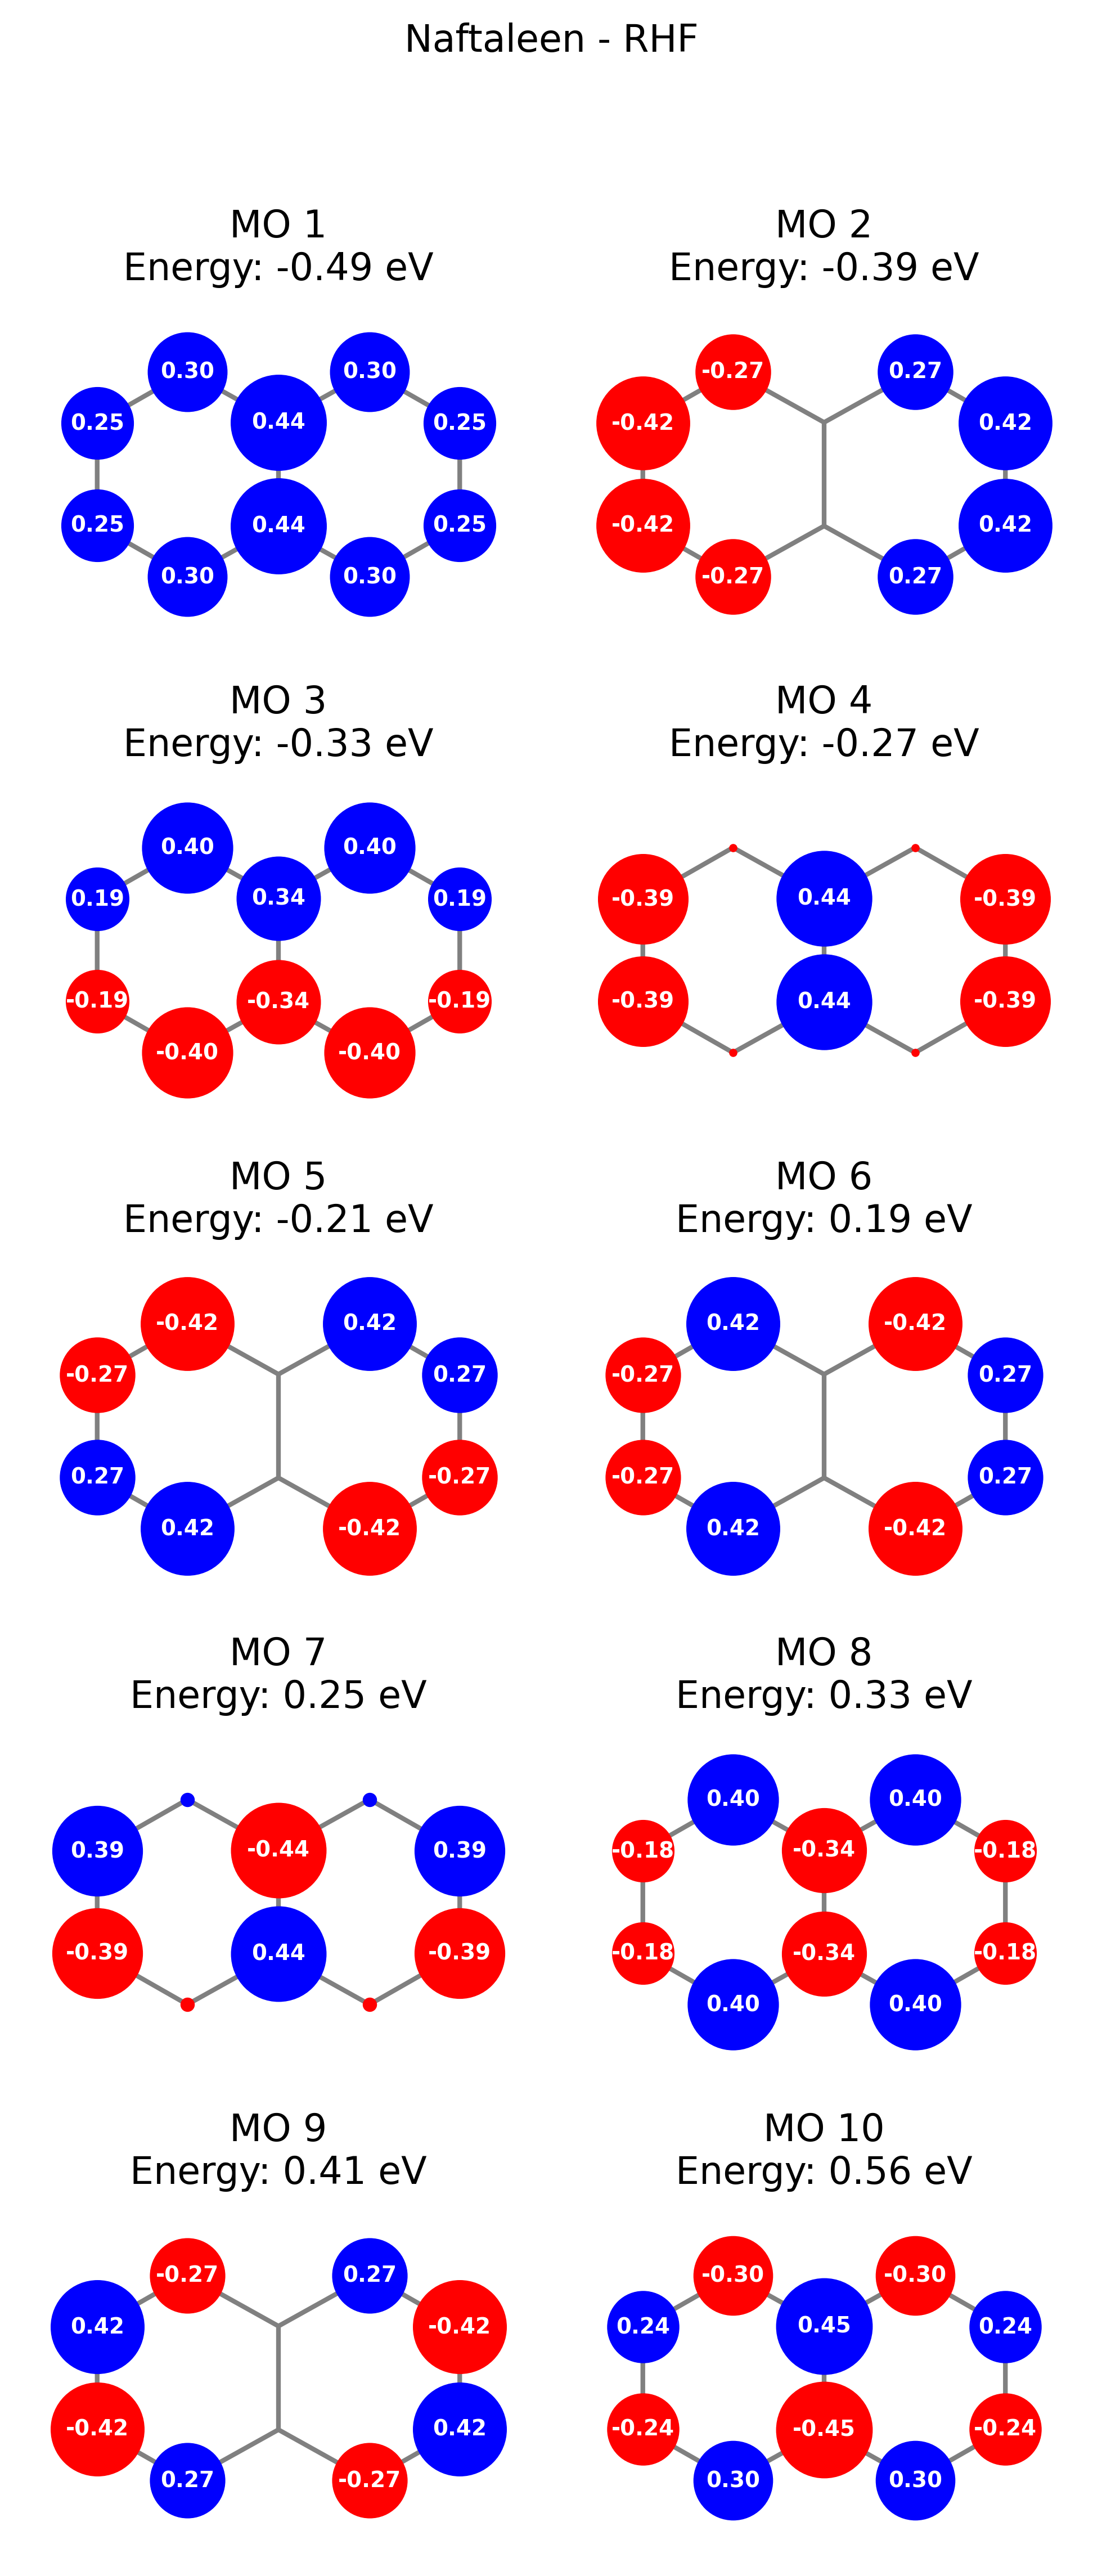

In [45]:
plotting_of_the_system(10, pz_orbitals, mo_eigenvalues, 'RHF')

In [54]:
import sys
sys.path.append('/workspaces/bachelor-project-bridging-profile-Mattice-Criel/projects/Project-MatticeCriel/Benzene/Huckel')
from class_huckel import huckel
Naftaleen = huckel(10, -2, -1)
Naftaleen.create_matrix()

Naftaleen.huckel_matrix = np.array([
    [-2., -1.,  0.,  0.,  0.,  -1.,  0.,  0.,  0., 0.],
    [-1., -2., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
    [ 0., -1., -2., -1.,  0.,  0.,  0.,  0.,  0.,  0.],
    [ 0.,  0., -1., -2., -1.,  0.,  0.,  0.,  0.,  0.],
    [ 0.,  0.,  0., -1., -2., -1.,  0.,  0.,  0.,  -1.],
    [ -1.,  0.,  0.,  0., -1., -2., -1.,  0.,  0.,  0.],
    [ 0.,  0.,  0.,  0.,  0., -1., -2., -1.,  0.,  0.],
    [ 0.,  0.,  0.,  0.,  0.,  0., -1., -2., -1.,  0.],
    [ 0.,  0.,  0.,  0.,  0.,  0.,  0., -1., -2., -1.],
    [ 0.,  0.,  0.,  0.,  -1.,  0.,  0.,  0., -1., -2.]
])
huc_mat = Naftaleen.huckel_matrix


print(huc_mat)

[[-2. -1.  0.  0.  0. -1.  0.  0.  0.  0.]
 [-1. -2. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1. -2. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1. -2. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1. -2. -1.  0.  0.  0. -1.]
 [-1.  0.  0.  0. -1. -2. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1. -2. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1. -2. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1. -2. -1.]
 [ 0.  0.  0.  0. -1.  0.  0.  0. -1. -2.]]


In [55]:
Naftaleen.solve_huckel_matrix()
eigenvalues = Naftaleen.eigenvalues
print(eigenvalues)
eigenvectors = Naftaleen.eigenvectors

for i in [0,1,3,4,5,7,8]:
    eigenvectors[:,i] = - eigenvectors[:,i]
print(eigenvectors)

[-4.302776 -3.618034 -3.302776 -3.       -2.618034 -1.381966 -1.
 -0.697224 -0.381966  0.302776]
[[ 0.30055189 -0.2628659  -0.39958585  0.          0.42532484  0.42532484
   0.          0.39958585  0.2628659   0.30055189]
 [ 0.23070103 -0.42532506 -0.17352403 -0.40824806  0.26286604 -0.26286604
  -0.40824806 -0.17352403 -0.42532506 -0.23070103]
 [ 0.23070103 -0.42532506  0.17352403 -0.40824806 -0.26286604 -0.26286604
   0.40824806 -0.17352403  0.42532506  0.23070103]
 [ 0.30055189 -0.2628659   0.39958585 -0.         -0.42532484  0.42532484
   0.          0.39958585 -0.2628659  -0.30055189]
 [ 0.46140207 -0.          0.34704705  0.40824806 -0.          0.
  -0.40824806 -0.34704705 -0.          0.46140207]
 [ 0.46140207  0.         -0.34704705  0.40824806 -0.          0.
   0.40824806 -0.34704705 -0.         -0.46140207]
 [ 0.30055189  0.2628659  -0.39958585 -0.         -0.42532484 -0.42532484
  -0.          0.39958585 -0.2628659   0.30055189]
 [ 0.23070103  0.42532506 -0.17352403 -0.408

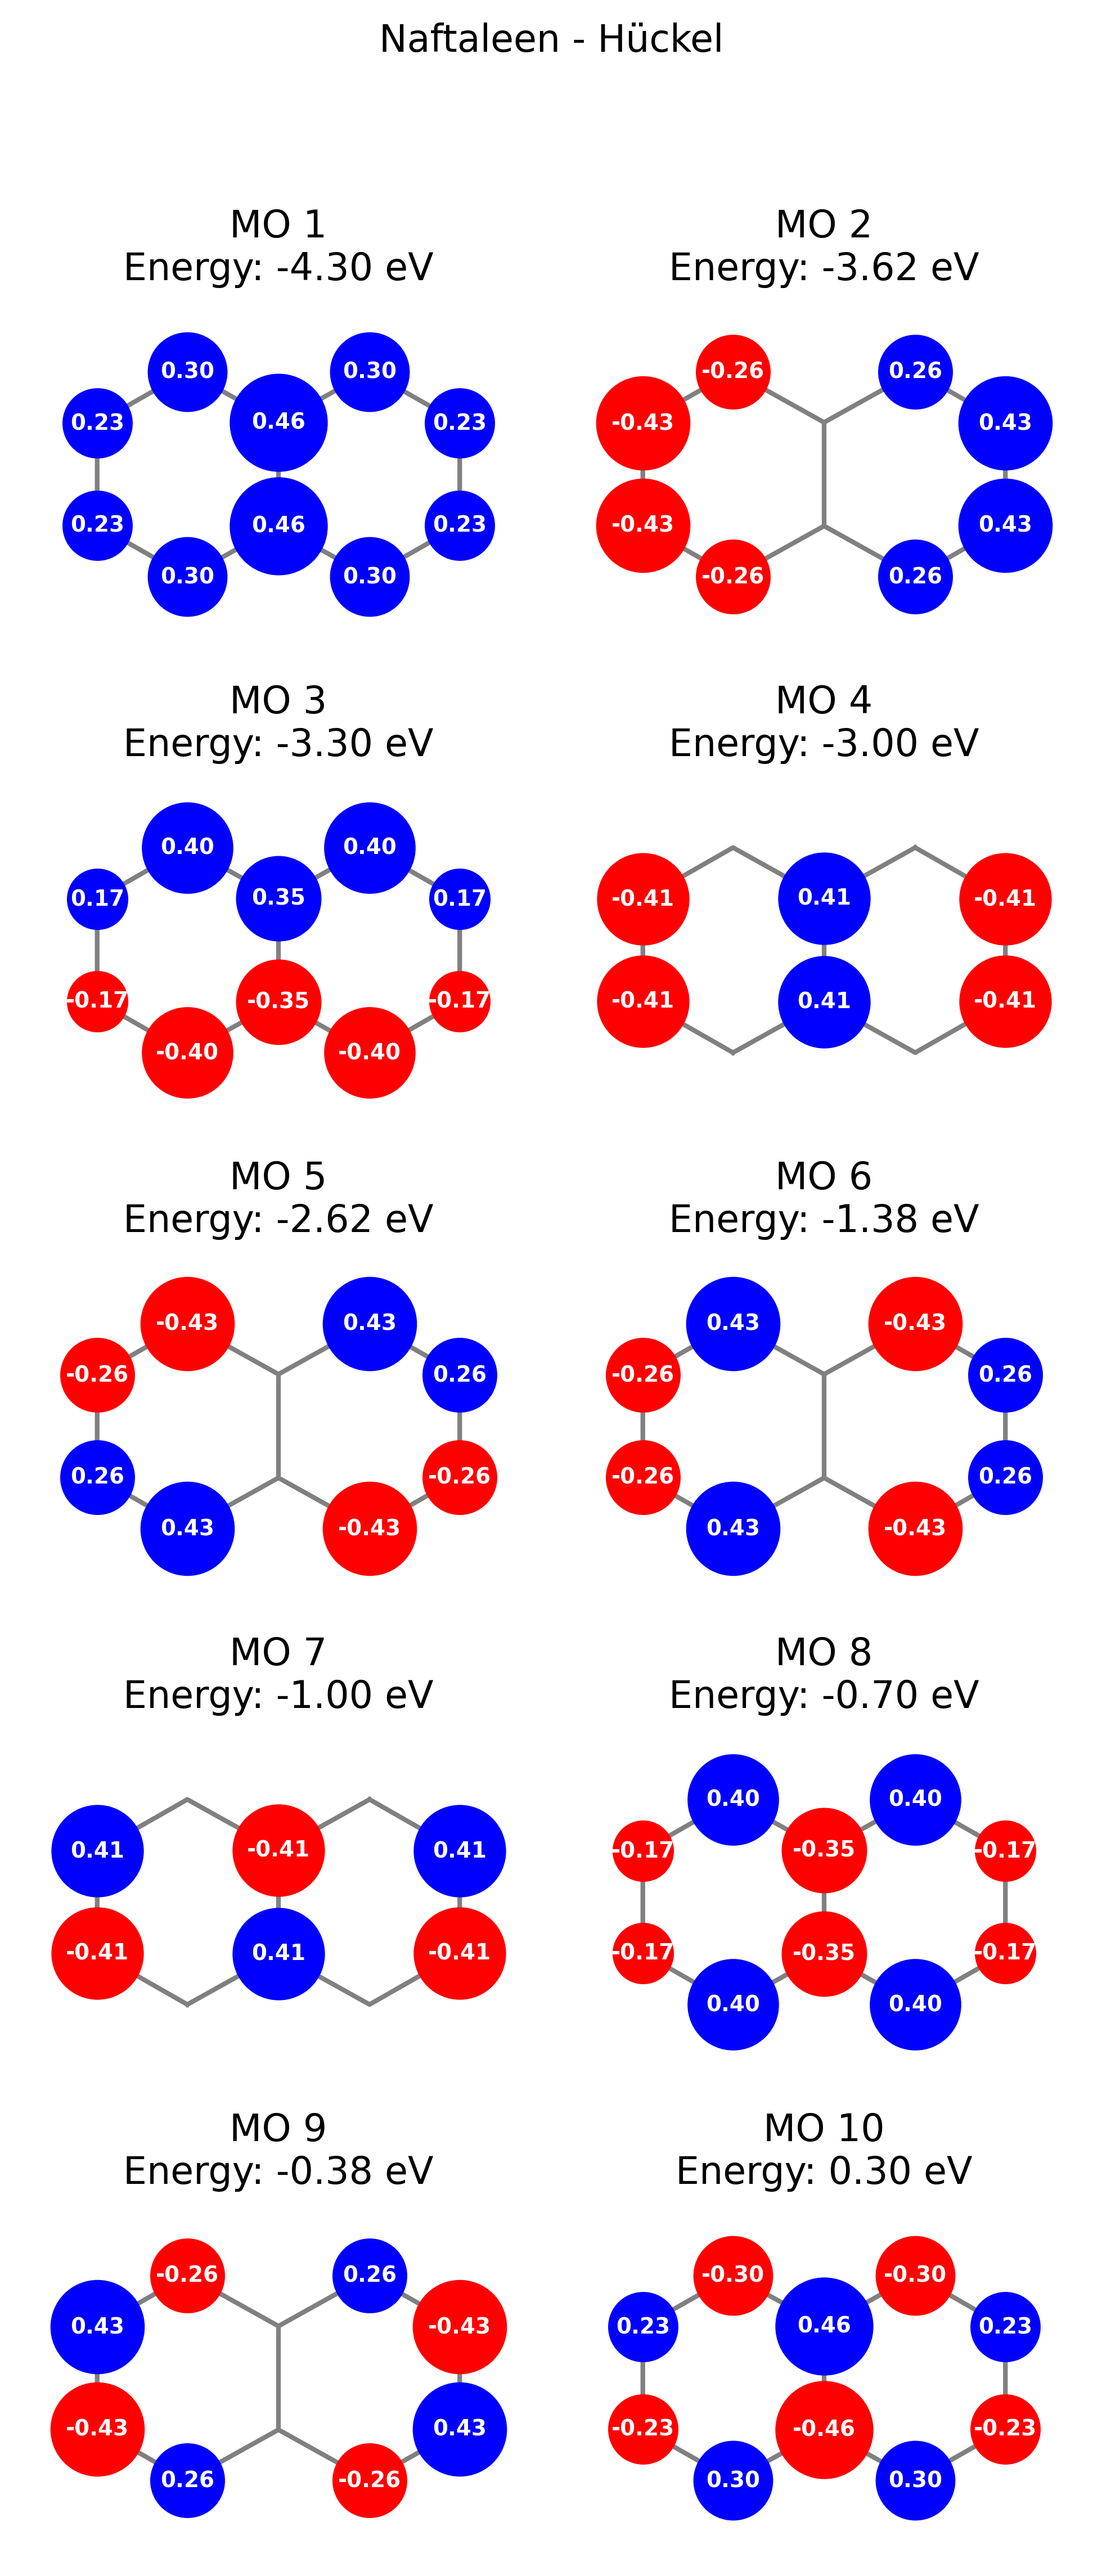

In [56]:
plotting_of_the_system(10, eigenvectors, eigenvalues, 'Hückel')

In [57]:
Naftaleen.huckel_matrix = -np.array([
    [0.00000000e+00, 2.13825831e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.11662347e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
    [2.13825831e-01, 0.00000000e+00, 2.13825831e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
    [0.00000000e+00, 2.13964306e-01, 0.00000000e+00, 2.13825831e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
    [0.00000000e+00, 0.00000000e+00, 2.13825831e-01, 0.00000000e+00, 2.11662347e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.11662347e-01],
    [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.11662347e-01, 0.00000000e+00, 2.06399255e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
    [2.11662347e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.06399255e-01, 0.00000000e+00, 2.11662347e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
    [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.11662347e-01, 0.00000000e+00, 2.13825831e-01, 0.00000000e+00, 0.00000000e+00],
    [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.13825831e-01, 0.00000000e+00, 2.13964306e-01, 0.00000000e+00],
    [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.13964306e-01, 0.00000000e+00, 2.13825831e-01],
    [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.11662347e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.13825831e-01, 0.00000000e+00]
]).round(6)
eigval, eigvec = np.linalg.eigh(Naftaleen.huckel_matrix)


for i in [0,3,4,9]:
    eigvec[:,i] = - eigvec[:,i]
print(eigvec)

[[ 3.01384081e-01 -2.62810661e-01 -3.98928321e-01  4.88163480e-03
   4.25359326e-01  4.25359326e-01 -4.88163480e-03  3.98928321e-01
   2.62810661e-01  3.01384081e-01]
 [ 2.36096812e-01 -4.25359326e-01 -1.73409044e-01 -4.05200689e-01
   2.62810661e-01 -2.62810661e-01 -4.05200689e-01 -1.73409044e-01
  -4.25359326e-01 -2.36096812e-01]
 [ 2.36096812e-01 -4.25359326e-01  1.73409044e-01 -4.05200689e-01
  -2.62810661e-01 -2.62810661e-01  4.05200689e-01 -1.73409044e-01
   4.25359326e-01  2.36096812e-01]
 [ 3.01384081e-01 -2.62810661e-01  3.98928321e-01  4.88163480e-03
  -4.25359326e-01  4.25359326e-01  4.88163480e-03  3.98928321e-01
  -2.62810661e-01 -3.01384081e-01]
 [ 4.54809699e-01 -6.88593817e-16  3.48670325e-01  4.14218713e-01
   1.54434999e-16  1.93905020e-18 -4.14218713e-01 -3.48670325e-01
   4.27202194e-16  4.54809699e-01]
 [ 4.54809699e-01  2.87055705e-16 -3.48670325e-01  4.14218713e-01
   4.63902981e-16 -2.69116386e-16  4.14218713e-01 -3.48670325e-01
   4.93007649e-16 -4.54809699e-01

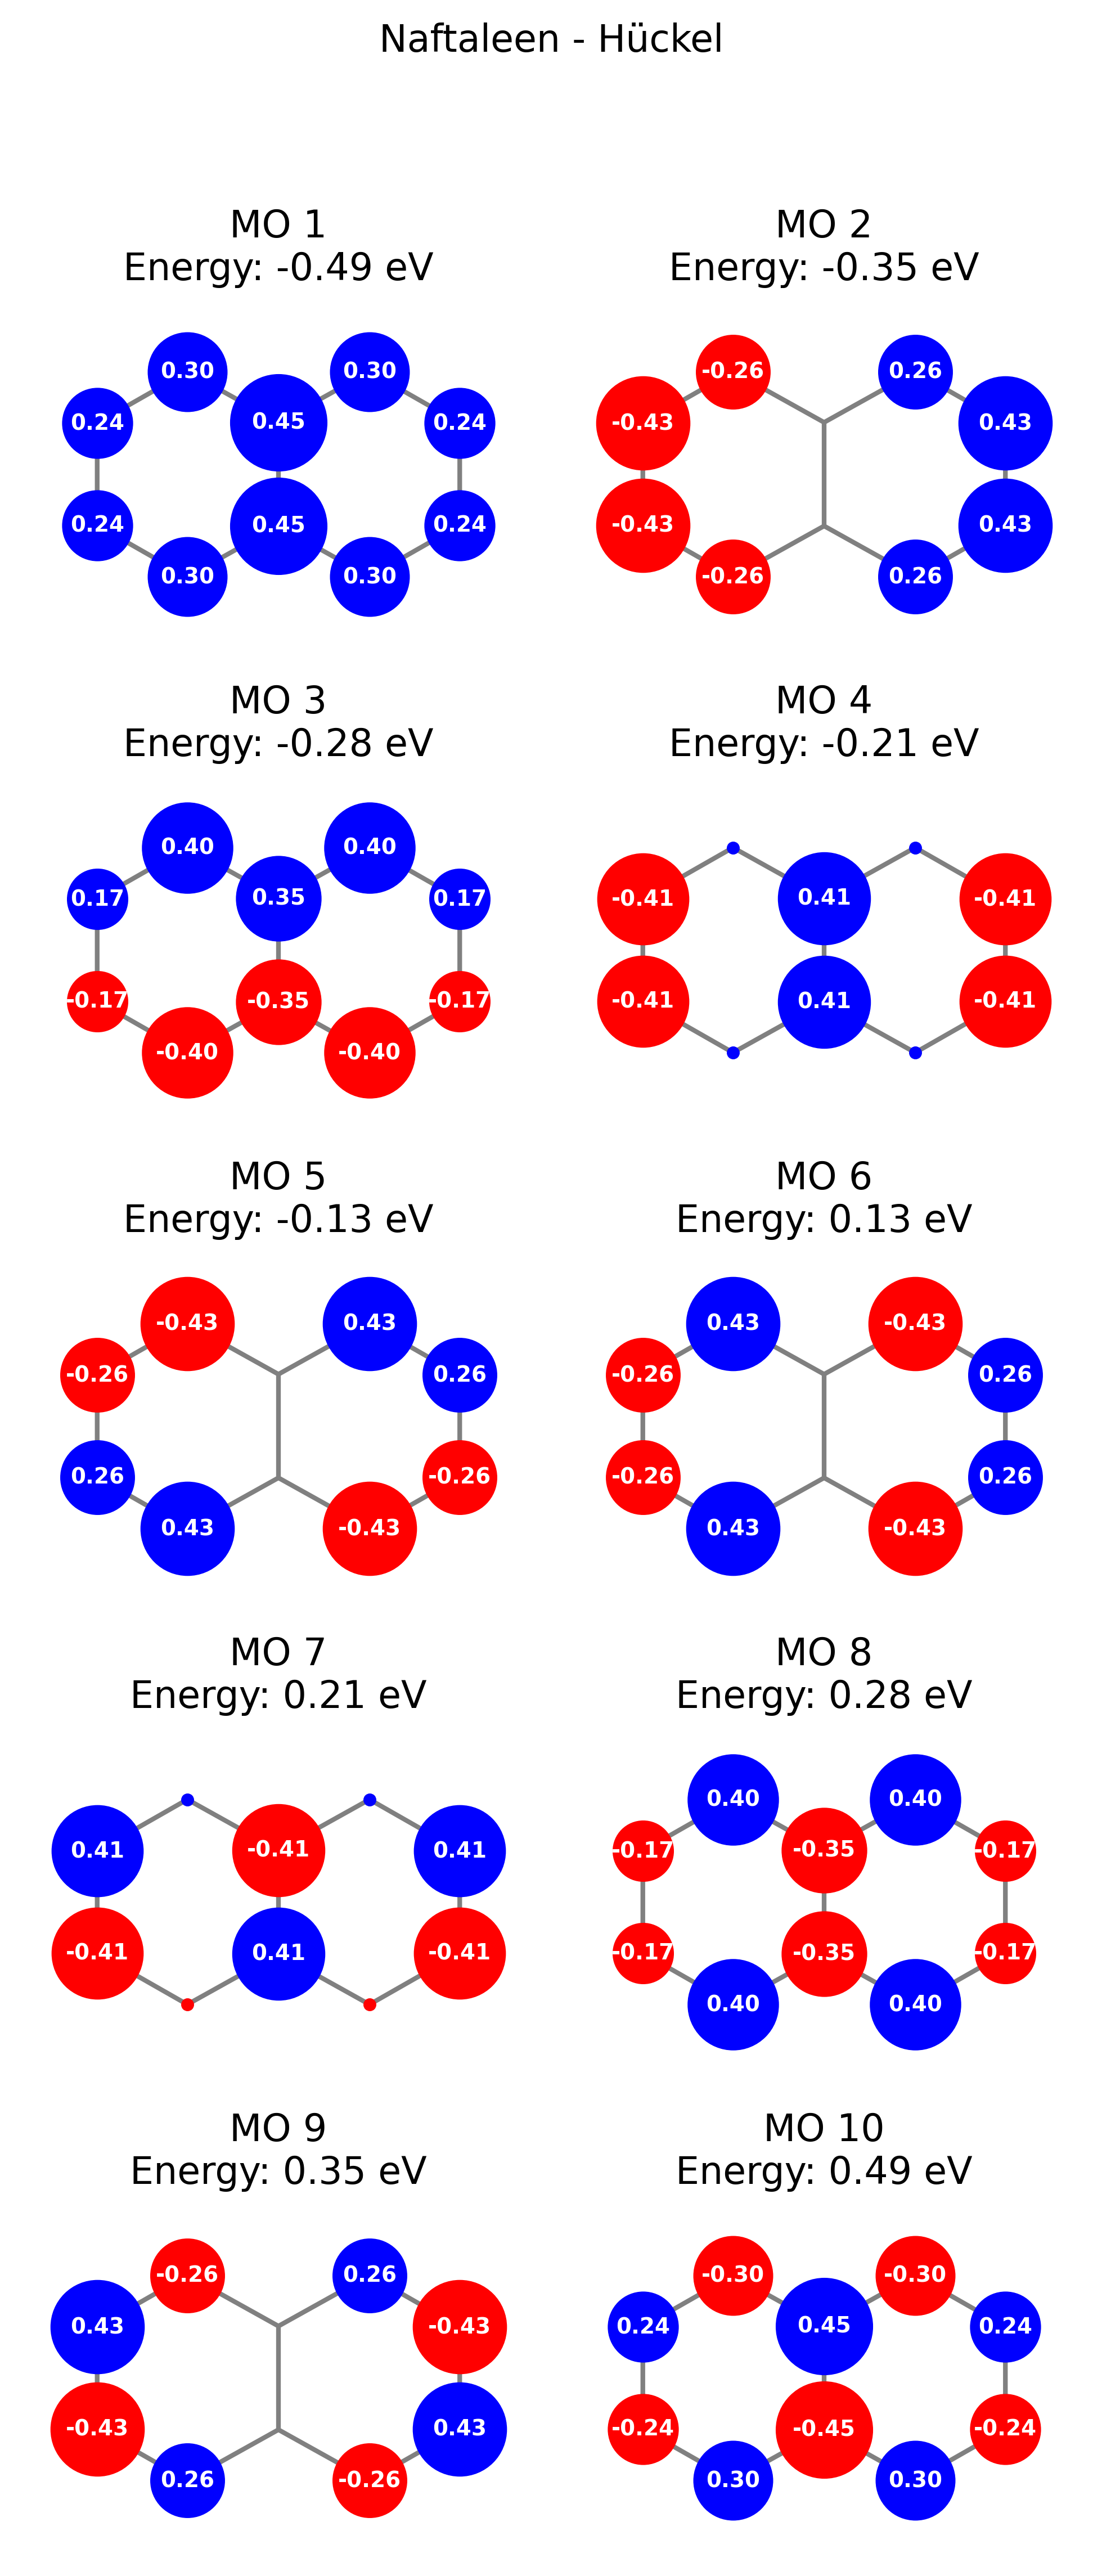

In [58]:
plotting_of_the_system(10, eigvec, eigval, 'Hückel')